In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Data import

In [3]:
df_APS = pd.read_csv('C:/Adatok/SzKK/Emese csoportja/Greti anyaga/corrected final data/final_table_20240110.csv', sep=';', encoding="ISO-8859-1")

### Data manipulation

In [4]:
# selecting the necessary columns for the analysis
APS_selected = df_APS.copy()
APS_selected = APS_selected[['age_at_disease_onset', 'gender', '1st_manifestation', 'time_between_1st_and_2nd_manifestation']]
APS_selected.rename(columns = {'gender':'sex'}, inplace=True)

# renaming values for visualisation purposes
sexes = {1:'men', 2:'women'}
APS_selected.replace({'sex':sexes}, inplace=True)

# removing instances where age is unknown
APS_age = APS_selected.copy()
APS_age = APS_age[APS_age['age_at_disease_onset'] != -1]

# removing instances where the elapsed time between the first two manifestations is unknown
APS_elapsedT = APS_selected.copy()
APS_elapsedT = APS_elapsedT[APS_elapsedT['time_between_1st_and_2nd_manifestation'] != -1]

# to make a selection for the ten most frequent diseases as first manifestation
disease_selection_list = [0, 1, 2, 3, 5, 6, 8, 9, 11, 13]
APS_mfreqDiseases = APS_age.copy()
APS_mfreqDiseases = APS_mfreqDiseases[APS_mfreqDiseases['1st_manifestation'].isin(disease_selection_list)]

# to replace disease values with abbreviations for visualisation purposes
diseases_dict = {0:'HT', 1:'GD', 2:'AD', 3:'CeD', 5:'T1D', 6:'CD', 8:'RA', 9:'PsO', 11:'Vit', 13:'SLE'}
APS_mfreqDiseases.replace({'1st_manifestation':diseases_dict}, inplace=True)

### Basic statistics

In [5]:
# age of the youngest and oldest patients
print(f"youngest age at disease onset: {APS_age['age_at_disease_onset'].min()}")
print(f"oldest age at disease onset: {APS_age['age_at_disease_onset'].max()}")

# mean and median age for the total population
print(f"APS mean age total: {np.mean(APS_age['age_at_disease_onset'])}")
print(f"APS median age total: {np.median(APS_age['age_at_disease_onset'])}")

# to separate men and women
APS_age_men = APS_age[APS_age['sex'] == 'men']
APS_age_women = APS_age[APS_age['sex'] == 'women']

# to calculate means and medians
print(f"APS mean age for MEN: {np.mean(APS_age_men['age_at_disease_onset'])}")
print(f"APS median age for MEN: {np.median(APS_age_men['age_at_disease_onset'])}")
print(f"APS mean age for WOMEN: {np.mean(APS_age_women['age_at_disease_onset'])}")
print(f"APS median age for WOMEN: {np.median(APS_age_women['age_at_disease_onset'])}")

youngest age at disease onset: 1
oldest age at disease onset: 83
APS mean age total: 31.778688524590162
APS median age total: 32.0
APS mean age for MEN: 26.03448275862069
APS median age for MEN: 25.0
APS mean age for WOMEN: 32.86038961038961
APS median age for WOMEN: 33.0


In [6]:
# shortest and longest elapsed times between the first two manifestations
APS_elapsedT_selected = APS_elapsedT[APS_elapsedT['time_between_1st_and_2nd_manifestation'] != 0]
print(f"shortest elapsed time between the first two manifestations: {APS_elapsedT_selected['time_between_1st_and_2nd_manifestation'].min()} years")
print(f"longest elapsed time between the first two manifestations: {APS_elapsedT_selected['time_between_1st_and_2nd_manifestation'].max()} years")

# the number of patients where the first two manifestations were identified together
APS_elapsedT_selected2 = APS_elapsedT[APS_elapsedT['time_between_1st_and_2nd_manifestation'] == 0]
print(f"number of patients where the first two manifestations were identified at the same time: {len(APS_elapsedT_selected2)}")

shortest elapsed time between the first two manifestations: 1 years
longest elapsed time between the first two manifestations: 53 years
number of patients where the first two manifestations were identified at the same time: 67


In [7]:
# percentage of men and women in the total population
APS_sexGrouped = APS_selected.groupby('sex').count()[['age_at_disease_onset']]
APS_sexGrouped.rename(columns = {'age_at_disease_onset':'count'}, inplace=True)
APS_sexGrouped['percentage'] = APS_sexGrouped['count'] / APS_sexGrouped['count'].sum() * 100
APS_sexGrouped

,count,percentage
sex,,
men,60,15.789474
women,320,84.210526


### Visualisation

In [8]:
# to suppress FutureWarning
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

Text(-0.065, 0.205, "E'")

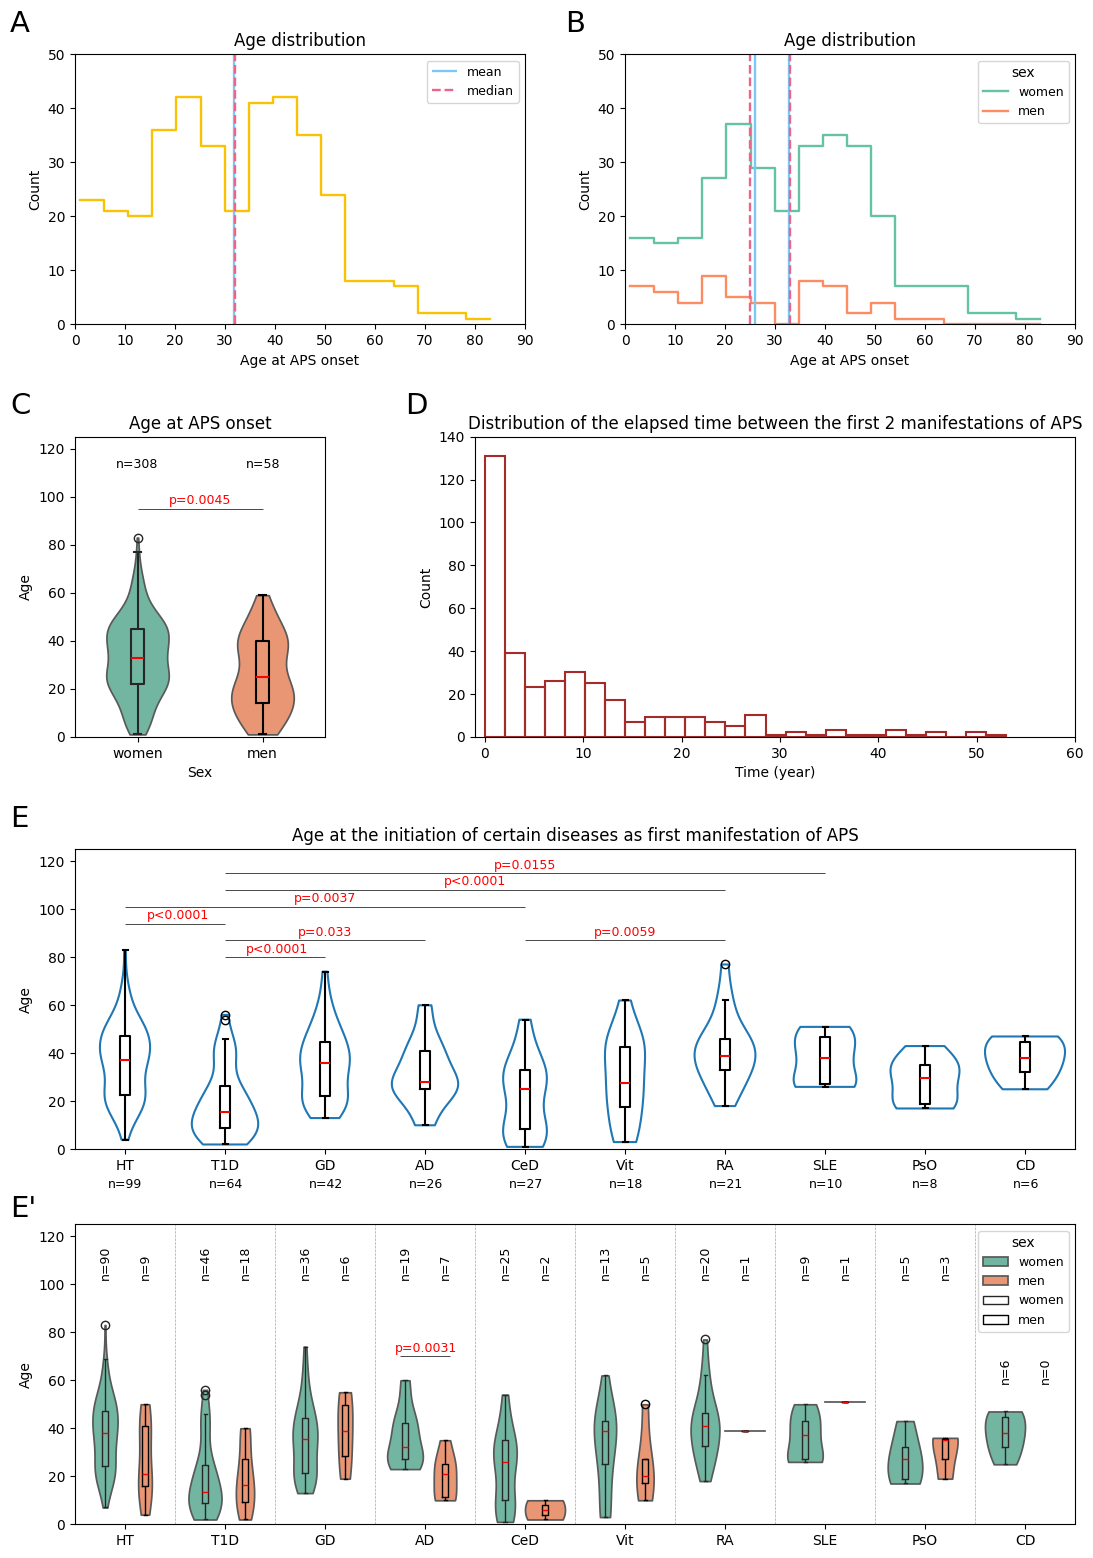

In [12]:
# to set the size of axis ticks' labels
plt.rc('axes', titlesize=12)
plt.rc('axes', labelsize=10)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('legend', fontsize=9)

# figure
fig = plt.figure(figsize=(10,15))   #constrained_layout=True
ax1 = fig.add_axes([0,0.8,0.45,0.18])
ax2 = fig.add_axes([0.55,0.8,0.45,0.18])
ax3 = fig.add_axes([0,0.525,0.25,0.2])
ax4 = fig.add_axes([0.4,0.525,0.6,0.2])
ax5 = fig.add_axes([0,0.25,1,0.2])
ax6 = fig.add_axes([0,0,1,0.2])

# A
sns.histplot(data=APS_age, x='age_at_disease_onset', 
             binwidth=4.9, fill=False, element='step', color='#FAC205', linewidth=1.7, ax=ax1)
ax1.vlines(x=31.78, ymin=0, ymax=50, color='#7BC8F6', label='mean', linewidth=1.7)
ax1.vlines(x=32, ymin=0, ymax=50, linestyles='dashed', color='#e9658b', label='median', linewidth=1.7)
ax1.set_xlim((0,90))
ax1.set_ylim((0,50))
ax1.set_xlabel('Age at APS onset')
ax1.set_ylabel('Count')
ax1.set_title('Age distribution')
ax1.legend()

# B
sns.histplot(data=APS_age, x='age_at_disease_onset', hue=APS_age['sex'], 
             binwidth=4.9, fill=False, element='step', linewidth=1.7, palette='Set2', ax=ax2)
ax2.vlines(x=(26.03, 32.86), ymin=0, ymax=50, color='#7BC8F6', label='mean', linewidth=1.7)
ax2.vlines(x=(25, 33), ymin=0, ymax=50, linestyles='dashed', color='#e9658b', label='median', linewidth=1.7)
ax2.set_xlim((0,90))
ax2.set_ylim((0,50))
ax2.set_xlabel('Age at APS onset')
ax2.set_ylabel('Count')
ax2.set_title('Age distribution')

# C
PROPS = {'medianprops':{'color':'red'}, 'zorder': 2}   # for the box plots (inside the violin plots)

sns.violinplot(data=APS_age, x='sex', y='age_at_disease_onset', hue='sex', 
               width=0.5, cut=0, palette='Set2', inner=None, ax=ax3)
sns.boxplot(data=APS_age, x='sex', y='age_at_disease_onset', hue='sex', 
            width=0.1, fill=False, color='black', **PROPS, ax=ax3)
ax3.hlines(y=95, xmin=0, xmax=1, color='black', linewidth=0.5)
ax3.text(0.25, 97, 'p=0.0045', c='red', fontsize=9)
ax3.text(-0.17, 112, 'n=308', fontsize=9)
ax3.text(0.87, 112, 'n=58', fontsize=9)
ax3.set_ylim(0,125)
ax3.set_xlim(-0.5,1.5)
ax3.set_ylabel('Age')
ax3.set_xlabel('Sex')
ax3.set_title('Age at APS onset')

# D
sns.histplot(data=APS_elapsedT, x='time_between_1st_and_2nd_manifestation', 
             binwidth=2, fill=False, linewidth=1.5, color='brown', ax=ax4)
ax4.set_xlim((-1,60))
ax4.set_ylim((0,140))
ax4.set_xlabel('Time (year)')
ax4.set_ylabel('Count')
ax4.set_title('Distribution of the elapsed time between the first 2 manifestations of APS')

# E
sns.violinplot(data=APS_mfreqDiseases, x='1st_manifestation', y='age_at_disease_onset', 
               width=0.8, cut=0, fill=False, inner=None, ax=ax5, 
               order=['HT', 'T1D', 'GD', 'AD', 'CeD', 'Vit', 'RA', 'SLE', 'PsO', 'CD'])
sns.boxplot(data=APS_mfreqDiseases, x='1st_manifestation', y='age_at_disease_onset', 
            width=0.1, fill=False, color='black', **PROPS, ax=ax5, 
            order=['HT', 'T1D', 'GD', 'AD', 'CeD', 'Vit', 'RA', 'SLE', 'PsO', 'CD'])
ax5.hlines(y=80, xmin=1, xmax=2, color='black', linewidth=0.5)
ax5.hlines(y=87, xmin=1, xmax=3, color='black', linewidth=0.5)
ax5.hlines(y=87, xmin=4, xmax=6, color='black', linewidth=0.5)
ax5.hlines(y=94, xmin=0, xmax=1, color='black', linewidth=0.5)
ax5.hlines(y=101, xmin=0, xmax=4, color='black', linewidth=0.5)
ax5.hlines(y=108, xmin=1, xmax=6, color='black', linewidth=0.5)
ax5.hlines(y=115, xmin=1, xmax=7, color='black', linewidth=0.5)
ax5.text(1.21, 82, 'p<0.0001', c='red', fontsize=9)
ax5.text(1.73, 89, 'p=0.033', c='red', fontsize=9)
ax5.text(4.69, 89, 'p=0.0059', c='red', fontsize=9)
ax5.text(0.22, 96, 'p<0.0001', c='red', fontsize=9)
ax5.text(1.69, 103, 'p=0.0037', c='red', fontsize=9)
ax5.text(3.19, 110, 'p<0.0001', c='red', fontsize=9)
ax5.text(3.69, 117, 'p=0.0155', c='red', fontsize=9)
ax5.text(-0.17, -16, 'n=99', fontsize=9)
ax5.text(0.84, -16, 'n=64', fontsize=9)
ax5.text(1.84, -16, 'n=42', fontsize=9)
ax5.text(2.84, -16, 'n=26', fontsize=9)
ax5.text(3.84, -16, 'n=27', fontsize=9)
ax5.text(4.84, -16, 'n=18', fontsize=9)
ax5.text(5.84, -16, 'n=21', fontsize=9)
ax5.text(6.84, -16, 'n=10', fontsize=9)
ax5.text(7.87, -16, 'n=8', fontsize=9)
ax5.text(8.88, -16, 'n=6', fontsize=9)
ax5.set_ylim(0,125)
ax5.set_xlim(-0.5,9.5)
ax5.set_ylabel('Age')
ax5.set_xlabel('')
ax5.set_title('Age at the initiation of certain diseases as first manifestation of APS')

# E'
sns.violinplot(data=APS_mfreqDiseases, x='1st_manifestation', y='age_at_disease_onset', hue='sex', 
               palette='Set2', width=0.8, cut=0, inner=None, ax=ax6, 
               order=['HT', 'T1D', 'GD', 'AD', 'CeD', 'Vit', 'RA', 'SLE', 'PsO', 'CD'])
sns.boxplot(data=APS_mfreqDiseases, x='1st_manifestation', y='age_at_disease_onset', hue='sex', 
            fill=False, color='black', linewidth=1, gap=.85, **PROPS, ax=ax6, 
            order=['HT', 'T1D', 'GD', 'AD', 'CeD', 'Vit', 'RA', 'SLE', 'PsO', 'CD'])
ax6.vlines(x=(0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5), 
           ymin=0, ymax=125, linestyles='dashed', color='grey', linewidth=0.5, alpha=0.7)
ax6.hlines(y=70, xmin=2.75, xmax=3.25, color='black', linewidth=0.5)
ax6.text(2.7, 72, 'p=0.0031', c='red', fontsize=9)
ax6.text(-0.26, 103, 'n=90', rotation='vertical', fontsize=9)
ax6.text(0.14, 103, 'n=9', rotation='vertical', fontsize=9)
ax6.text(0.74, 103, 'n=46', rotation='vertical', fontsize=9)
ax6.text(1.14, 103, 'n=18', rotation='vertical', fontsize=9)
ax6.text(1.74, 103, 'n=36', rotation='vertical', fontsize=9)
ax6.text(2.14, 103, 'n=6', rotation='vertical', fontsize=9)
ax6.text(2.74, 103, 'n=19', rotation='vertical', fontsize=9)
ax6.text(3.14, 103, 'n=7', rotation='vertical', fontsize=9)
ax6.text(3.74, 103, 'n=25', rotation='vertical', fontsize=9)
ax6.text(4.14, 103, 'n=2', rotation='vertical', fontsize=9)
ax6.text(4.74, 103, 'n=13', rotation='vertical', fontsize=9)
ax6.text(5.14, 103, 'n=5', rotation='vertical', fontsize=9)
ax6.text(5.74, 103, 'n=20', rotation='vertical', fontsize=9)
ax6.text(6.14, 103, 'n=1', rotation='vertical', fontsize=9)
ax6.text(6.74, 103, 'n=9', rotation='vertical', fontsize=9)
ax6.text(7.14, 103, 'n=1', rotation='vertical', fontsize=9)
ax6.text(7.74, 103, 'n=5', rotation='vertical', fontsize=9)
ax6.text(8.14, 103, 'n=3', rotation='vertical', fontsize=9)
ax6.text(8.74, 60, 'n=6', rotation='vertical', fontsize=9)
ax6.text(9.14, 60, 'n=0', rotation='vertical', fontsize=9)
ax6.set_ylim(0,125)
ax6.set_xlim(-0.5,9.5)
ax6.set_ylabel('Age')
ax6.set_xlabel('')


# lettering for the figure
fig.text(-0.065, 0.995, "A", fontsize=21)
fig.text(0.49, 0.995, "B", fontsize=21)
fig.text(-0.065, 0.74, "C", fontsize=21)
fig.text(0.33, 0.74, "D", fontsize=21)
fig.text(-0.065, 0.465, "E", fontsize=21)
fig.text(-0.065, 0.205, "E'", fontsize=21)


#fig.savefig('ageSex_APS.tiff', bbox_inches='tight', dpi=300)
#fig.savefig('ageSex_APS.pdf', bbox_inches='tight', dpi=300)